In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## READ IN THE DATASET CONSTRUCTED DURING EXECUTION

In [2]:
df = pd.read_csv('data.csv')
df.shape

(267, 7)

# We need to drop certain points in order to make the dataset the size that can be splitted 

In [3]:
to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]

# A check will be run on data before the 'accident' only and on the whole dataset

In [4]:
traindf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf.drop(to_drop, inplace=True)
traindf = traindf.to_numpy()
traindf_list = np.split(traindf, 18)

traindf_before =  df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf_before =traindf_before.iloc[:144, :]
traindf_before = traindf_before.to_numpy()
traindf_before_list = np.split(traindf_before, 24)

### in case the graphs have too many points take one sample per hour to test and plot on

In [5]:
testdf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
testdf = testdf.iloc[::6, :]

In [6]:
# data_to_plot = df.iloc[::6, :]
# data_to_plot.head()
# data_to_plot = data_to_plot.to_numpy()
data_to_plot = df.to_numpy()

data_to_plot_before = df.iloc[:144, :]
# data_to_plot = data_to_plot.iloc[::6, :]
data_to_plot_before = df.to_numpy()

In [28]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max, title):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusters')
        plt.ylabel('Silhouette Score')
        plt.title(title)
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

In [12]:
traindf_12_list = np.split(traindf_before, 12)

# Train the model with different number of partial fits on data before accident

/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


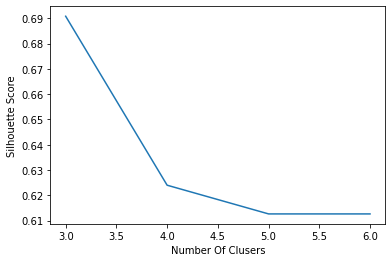

The highest silhouette scores(0.6908026736015564) is for 3 clusers


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


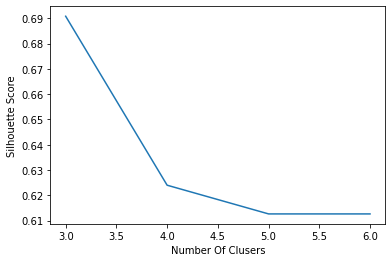

The highest silhouette scores(0.6908026736015564) is for 3 clusers


In [13]:
model_24 = Birch(n_clusters=None, threshold=0.2)

for i in traindf_before_list:
    model_24.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_24, traindf_before, 3, 6, 'Splitting data into 24')

model_24.set_params(n_clusters = n)
model_24.partial_fit()
    
labels_24 = model_24.predict(data_to_plot_before[:, 3:])

################################################################################

model_12 = Birch(n_clusters=None, threshold=0.2)

for i in traindf_12_list:
    model_12.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_12, traindf_before, 3, 6, 'Splitting data into 24')

model_12.set_params(n_clusters = n)
model_12.partial_fit()
    
labels_12 = model_12.predict(data_to_plot_before[:, 3:])

The silhouette score is exactly the same for both models so no more tests were run on the data. The partial clustering size is important for outliers removal

Text(0.5, 0.98, 'Checking partail clustering function')

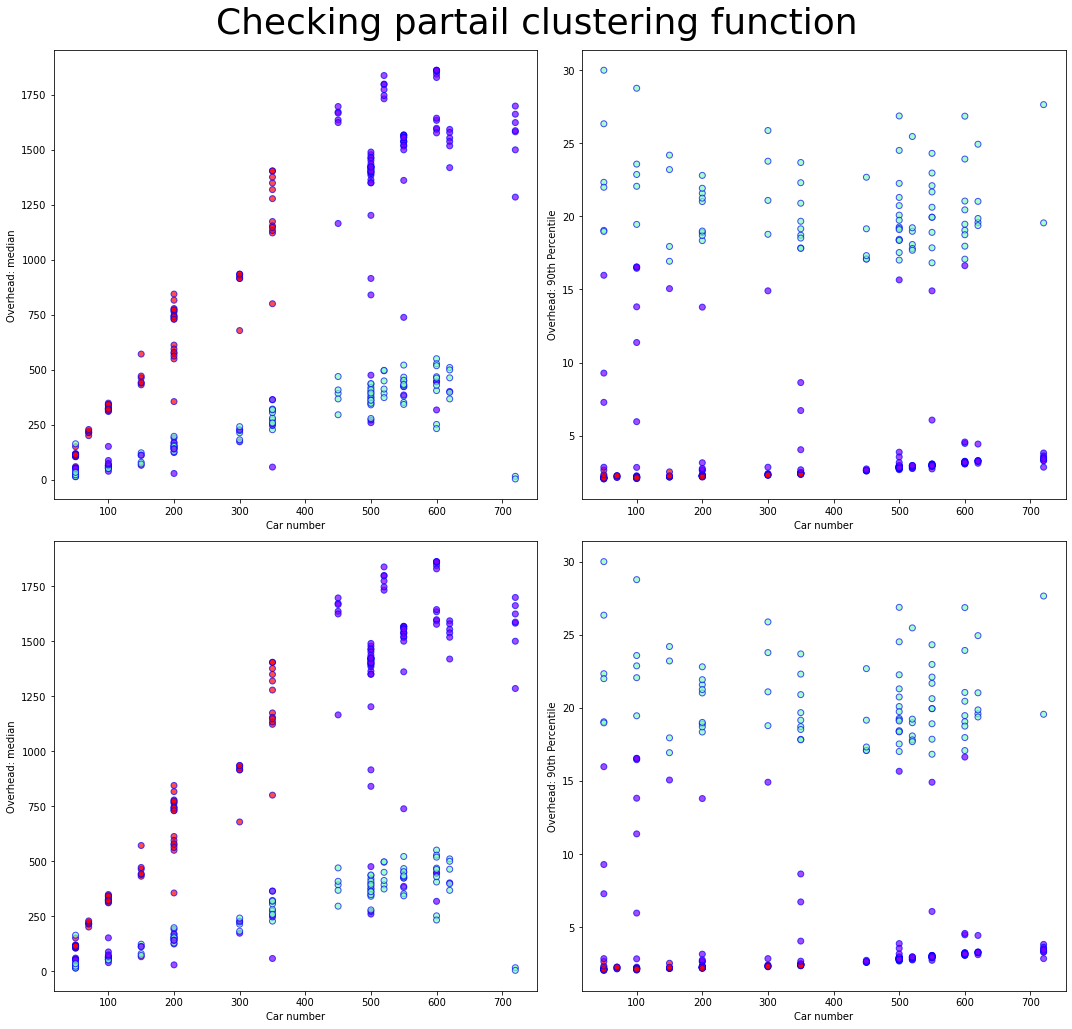

In [15]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_to_plot_before[:,1], data_to_plot_before[:,2], c=labels_24, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[0,0].set_ylabel('Overhead: median')
axs[0,0].set_xlabel('Car number')

axs[0,1].scatter(data_to_plot_before[:,1], data_to_plot_before[:,6], c=labels_24, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[0,1].set_ylabel('Overhead: 90th Percentile')
axs[0,1].set_xlabel('Car number')

axs[1,0].scatter(data_to_plot_before[:,1], data_to_plot_before[:,2], c=labels_12, cmap='rainbow', alpha=0.7, edgecolors='b')  
axs[1,0].set_ylabel('Overhead: median')
axs[1,0].set_xlabel('Car number')

axs[1,1].scatter(data_to_plot_before[:,1], data_to_plot_before[:,6], c=labels_12, cmap='rainbow', alpha=0.7, edgecolors='b')    
axs[1,1].set_ylabel('Overhead: 90th Percentile')
axs[1,1].set_xlabel('Car number')

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Checking partail clustering function', fontsize=36)

# CHECK OF SIZES FOR OUTLIERS REMOVAL
## WE USED MODIFIED Z SCORE TO REMOVE OUTLIERS ON THE DATASET before accident because otherwise the whole dataset would be classified as one cluster

In [8]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
# to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]
# data_split_modified_z.drop(to_drop, inplace=True)
data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()

In [9]:
data_split_modified_z.shape

(252, 6)

Test will be run on the splits size of 18, 12, 6, and 2

In [9]:
""" SIZE 18 """
data_split_modified_z_18 = np.split(data_split_modified_z, 18)
indexes = [] 

for d in range(len(data_split_modified_z_18)):
    ind = []
    k = len(data_split_modified_z_18[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_18[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_18[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_18[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_18[d] = np.delete(data_split_modified_z_18[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_18[d]))))

data_split_modified_z_18 = np.concatenate(data_split_modified_z_18, axis=0)

Outliers detected: 1
Outliers detected: 0
Outliers detected: 3
Outliers detected: 3
Outliers detected: 1
Outliers detected: 1
Outliers detected: 3
Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 3


# 20 outliers

In [10]:
""" SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 12)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)

Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 2
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0


# 3 outliers

In [11]:
""" SIZE 6 """
data_split_modified_z_6 = np.split(data_split_modified_z, 6)
indexes = [] 

for d in range(len(data_split_modified_z_6)):
    ind = []
    k = len(data_split_modified_z_6[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_6[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_6[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_6[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_6[d] = np.delete(data_split_modified_z_6[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_6[d]))))

data_split_modified_z_6 = np.concatenate(data_split_modified_z_6, axis=0)

Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1


# 3 outliers

In [12]:
""" SIZE 2 """
data_split_modified_z_2 = np.split(data_split_modified_z, 2)
indexes = [] 

for d in range(len(data_split_modified_z_2)):
    ind = []
    k = len(data_split_modified_z_2[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_2[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_2[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_2[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_2[d] = np.delete(data_split_modified_z_2[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_2[d]))))

data_split_modified_z_2 = np.concatenate(data_split_modified_z_2, axis=0)

Outliers detected: 1
Outliers detected: 0


# 1 outliers

In [14]:
# data_split_modified_z_18.shape
# data_split_modified_z_18_list = np.split(data_split_modified_z_18, 20)

# WE TRAIN MODELS ON EACH OF THEM

In [17]:
model_18 = Birch(n_clusters=None, threshold=0.1)

# for i in data_split_modified_z_18_list:
#     model_18.partial_fit(i[:, :2])
    
model_18.partial_fit(data_split_modified_z_18[:, :2])

n = plot_silhouette_scores(model_18, data_split_modified_z_18[:, :2], 2, 6, 'Splitting data into 18')

model_18.set_params(n_clusters = n)
model_18.partial_fit()
    
labels_18 = model_18.predict(data_split_modified_z_18[:, :2])

#####################################################################
model_12 = Birch(n_clusters=None, threshold=0.1)

model_12.partial_fit(data_split_modified_z_12[:, :2])

n = plot_silhouette_scores(model_12, data_split_modified_z_12[:, :2], 2, 6, 'Splitting data into 12')

model_12.set_params(n_clusters = n)
model_12.partial_fit()
    
labels_12 = model_12.predict(data_split_modified_z_12[:, :2])


#####################################################################
model_6 = Birch(n_clusters=None, threshold=0.1)

model_6.partial_fit(data_split_modified_z_6[:, :2])

n = plot_silhouette_scores(model_6, data_split_modified_z_6[:, :2], 2, 6, 'Splitting data into 6')

model_6.set_params(n_clusters = n)
model_6.partial_fit()
    
labels_6 = model_6.predict(data_split_modified_z_6[:, :2])

#####################################################################
model_2 = Birch(n_clusters=None, threshold=0.1)

model_2.partial_fit(data_split_modified_z_2[:, :2])

n = plot_silhouette_scores(model_2, data_split_modified_z_2[:, :2], 2, 6, 'Splitting data into 2')

model_2.set_params(n_clusters = n)
model_2.partial_fit()
    
labels_2 = model_2.predict(data_split_modified_z_2[:, :2])



couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2
couldnt get the scores, plz help
returning number of clusters = 2


Text(0.5, 0.98, 'Different Sizes of Batches for Outlier Removal')

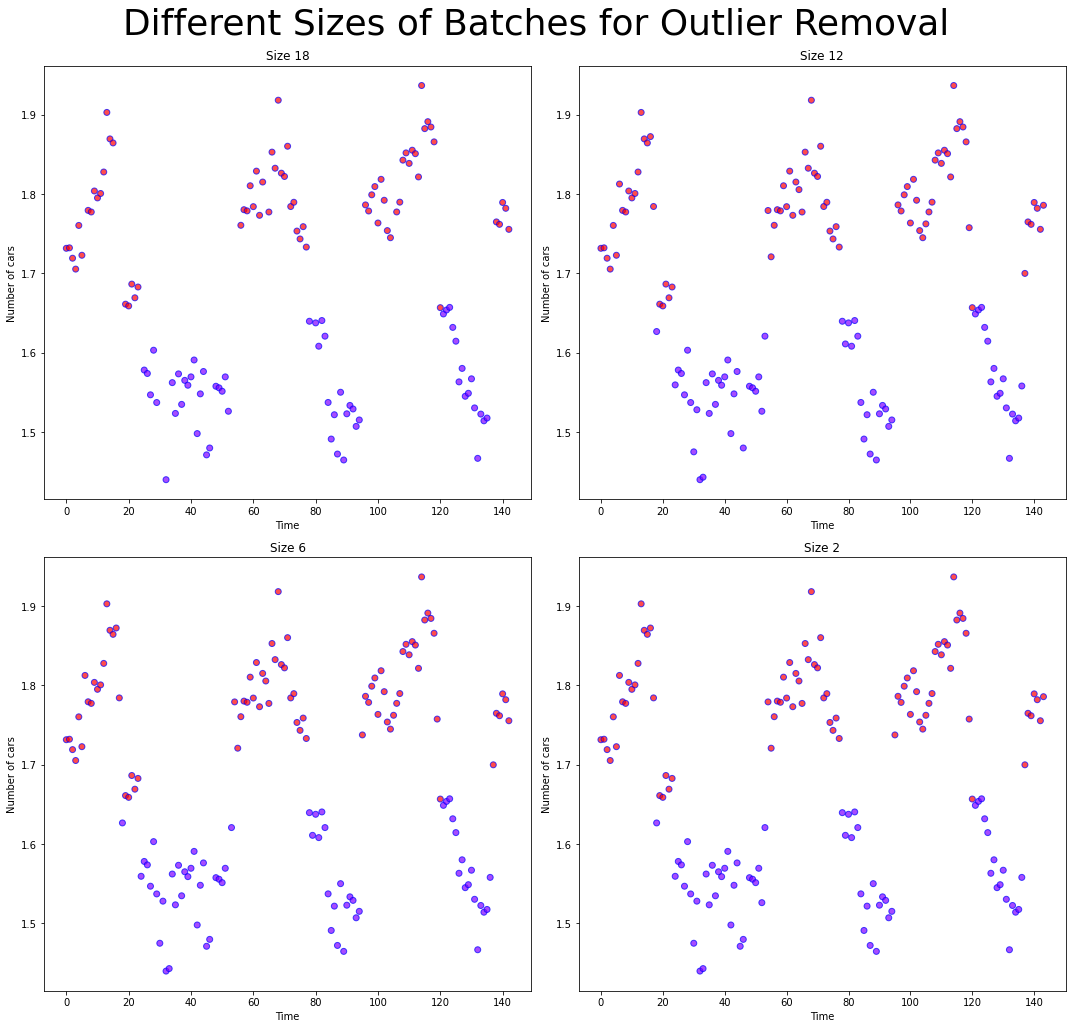

In [19]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_split_modified_z_18[:,5], data_split_modified_z_18[:,0], c=labels_18, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[0,0].set_ylabel('Number of cars')
axs[0,0].set_xlabel('Time')
axs[0,0].title.set_text("Size 18")

axs[0,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,0], c=labels_12, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[0,1].set_ylabel('Number of cars')
axs[0,1].set_xlabel('Time')
axs[0,1].title.set_text("Size 12")

axs[1,0].scatter(data_split_modified_z_6[:,5], data_split_modified_z_6[:,0], c=labels_6, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time')
axs[1,0].title.set_text("Size 6")

axs[1,1].scatter(data_split_modified_z_2[:,5], data_split_modified_z_2[:,0], c=labels_2, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,1].set_ylabel('Number of cars')
axs[1,1].set_xlabel('Time')
axs[1,1].title.set_text("Size 2")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Different Sizes of Batches for Outlier Removal', fontsize=36)

In [20]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]
data_split_modified_z.drop(to_drop, inplace=True)
# data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()

In [21]:
""" SIZE 18 """
data_split_modified_z_18 = np.split(data_split_modified_z, 18)
indexes = [] 

for d in range(len(data_split_modified_z_18)):
    ind = []
    k = len(data_split_modified_z_18[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_18[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_18[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_18[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_18[d] = np.delete(data_split_modified_z_18[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_18[d]))))

data_split_modified_z_18 = np.concatenate(data_split_modified_z_18, axis=0)


Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 3
Outliers detected: 0
Outliers detected: 0
Outliers detected: 3
Outliers detected: 0
Outliers detected: 0
Outliers detected: 3
Outliers detected: 4
Outliers detected: 3
Outliers detected: 1
Outliers detected: 7
Outliers detected: 1
Outliers detected: 2
Outliers detected: 1
Outliers detected: 3


In [22]:
""" SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 12)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)



Outliers detected: 0
Outliers detected: 2
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 3
Outliers detected: 4
Outliers detected: 3
Outliers detected: 3
Outliers detected: 3
Outliers detected: 4


In [23]:
""" SIZE 6 """
data_split_modified_z_6 = np.split(data_split_modified_z, 6)
indexes = [] 

for d in range(len(data_split_modified_z_6)):
    ind = []
    k = len(data_split_modified_z_6[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_6[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_6[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_6[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_6[d] = np.delete(data_split_modified_z_6[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_6[d]))))

data_split_modified_z_6 = np.concatenate(data_split_modified_z_6, axis=0)


Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 6
Outliers detected: 6


In [24]:

""" SIZE 2 """
data_split_modified_z_2 = np.split(data_split_modified_z, 2)
indexes = [] 

for d in range(len(data_split_modified_z_2)):
    ind = []
    k = len(data_split_modified_z_2[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_2[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_2[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_2[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_2[d] = np.delete(data_split_modified_z_2[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_2[d]))))

data_split_modified_z_2 = np.concatenate(data_split_modified_z_2, axis=0)

Outliers detected: 1
Outliers detected: 7


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


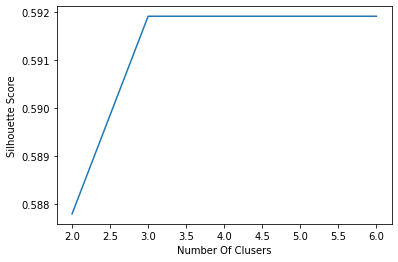

The highest silhouette scores(0.5919198918214905) is for 3 clusers


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


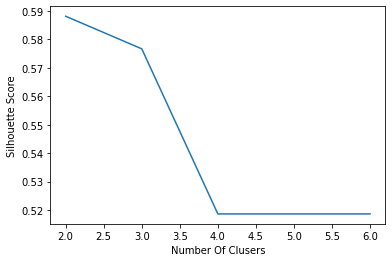

The highest silhouette scores(0.5881537635232373) is for 2 clusers


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


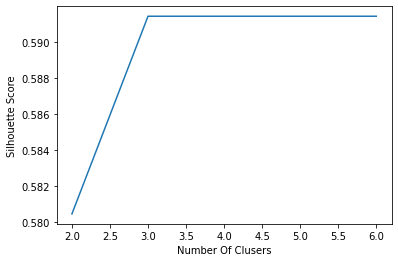

The highest silhouette scores(0.5914336930514553) is for 3 clusers


/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (4). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (5). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


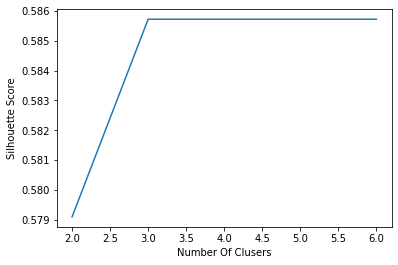

The highest silhouette scores(0.5857181606301092) is for 3 clusers


In [25]:
model_18 = Birch(n_clusters=None, threshold=0.1)

# for i in data_split_modified_z_18_list:
#     model_18.partial_fit(i[:, :2])
    
model_18.partial_fit(data_split_modified_z_18[:, :2])

n = plot_silhouette_scores(model_18, data_split_modified_z_18[:, :2], 2, 6, 'Splitting data into 18')

model_18.set_params(n_clusters = n)
model_18.partial_fit()
    
labels_18 = model_18.predict(data_split_modified_z_18[:, :2])

#####################################################################
model_12 = Birch(n_clusters=None, threshold=0.1)

model_12.partial_fit(data_split_modified_z_12[:, :2])

n = plot_silhouette_scores(model_12, data_split_modified_z_12[:, :2], 2, 6, 'Splitting data into 12')

model_12.set_params(n_clusters = n)
model_12.partial_fit()
    
labels_12 = model_12.predict(data_split_modified_z_12[:, :2])


#####################################################################
model_6 = Birch(n_clusters=None, threshold=0.1)

model_6.partial_fit(data_split_modified_z_6[:, :2])

n = plot_silhouette_scores(model_6, data_split_modified_z_6[:, :2], 2, 6, 'Splitting data into 6')

model_6.set_params(n_clusters = n)
model_6.partial_fit()
    
labels_6 = model_6.predict(data_split_modified_z_6[:, :2])

#####################################################################
model_2 = Birch(n_clusters=None, threshold=0.1)

model_2.partial_fit(data_split_modified_z_2[:, :2])

n = plot_silhouette_scores(model_2, data_split_modified_z_2[:, :2], 2, 6, 'Splitting data into 2')

model_2.set_params(n_clusters = n)
model_2.partial_fit()
    
labels_2 = model_2.predict(data_split_modified_z_2[:, :2])

Text(0.5, 0.98, 'Different Sizes of Batches for Outlier Removal')

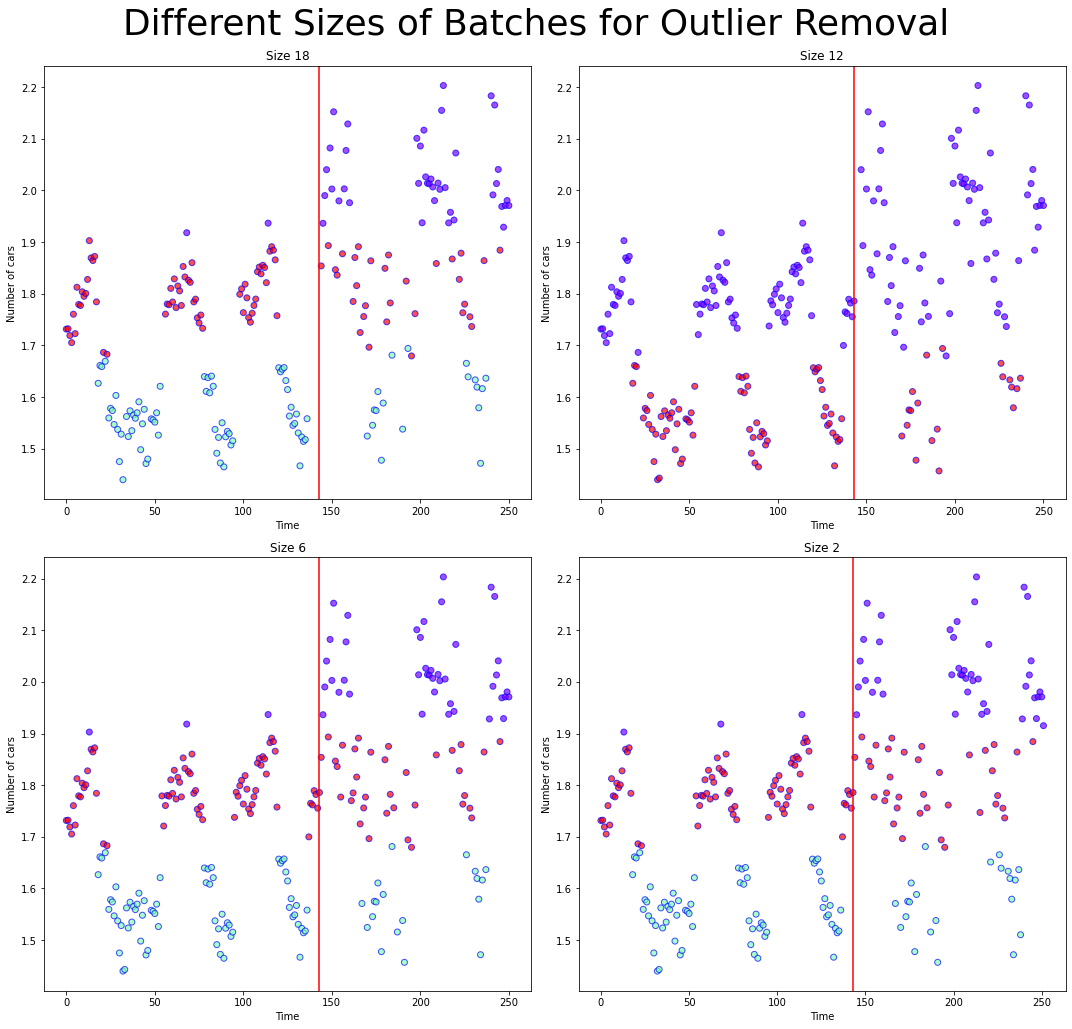

In [27]:
figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
axs[0,0].scatter(data_split_modified_z_18[:,5], data_split_modified_z_18[:,0], c=labels_18, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[0,0].set_ylabel('Number of cars')
axs[0,0].axvline(x=143, color='r')
axs[0,0].set_xlabel('Time')
axs[0,0].title.set_text("Size 18")

axs[0,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,0], c=labels_12, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[0,1].set_ylabel('Number of cars')
axs[0,1].axvline(x=143, color='r')
axs[0,1].set_xlabel('Time')
axs[0,1].title.set_text("Size 12")

axs[1,0].scatter(data_split_modified_z_6[:,5], data_split_modified_z_6[:,0], c=labels_6, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,0].axvline(x=143, color='r')
axs[1,0].set_ylabel('Number of cars')
axs[1,0].set_xlabel('Time')
axs[1,0].title.set_text("Size 6")

axs[1,1].scatter(data_split_modified_z_2[:,5], data_split_modified_z_2[:,0], c=labels_2, cmap='rainbow', alpha=0.7, edgecolors='b')   
axs[1,1].set_ylabel('Number of cars')
axs[1,1].axvline(x=143, color='r')
axs[1,1].set_xlabel('Time')
axs[1,1].title.set_text("Size 2")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Different Sizes of Batches for Outlier Removal', fontsize=36)